# Demo 数据集

## 库函数导入

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split


## 数据导入

In [2]:
# 使用莺尾花数据集的前两维数据，便于数据可视化
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 模型训练&可视化

0.9
0.7666666666666667
0.8
0.8
0.8
0.8


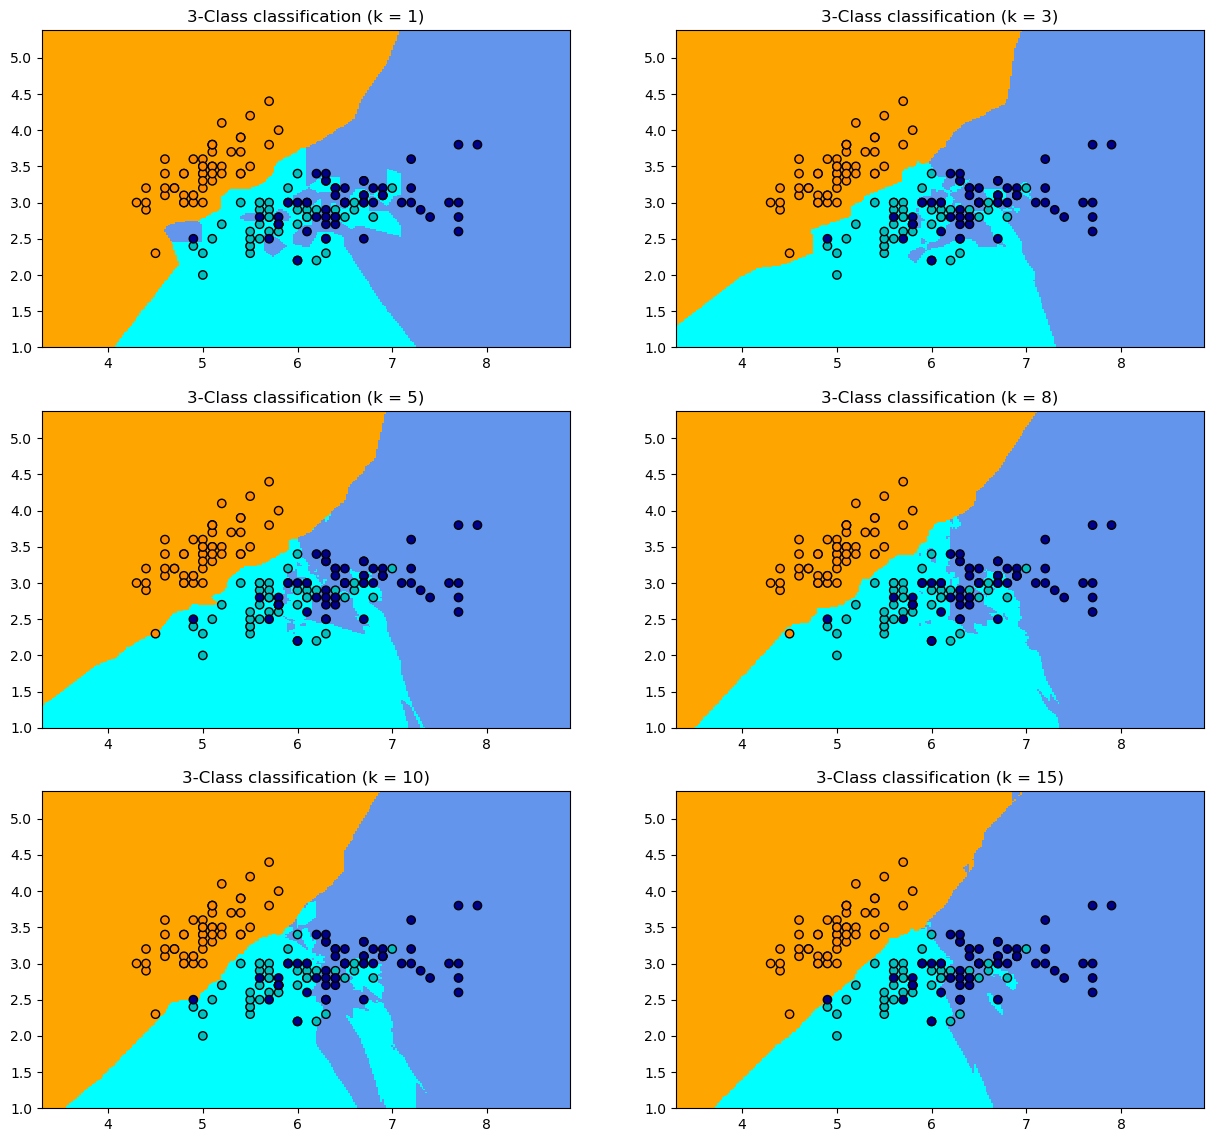

In [3]:
k_list = [1, 3, 5, 8, 10, 15]
h = .02
# 创建不同颜色的画布
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(15,14))
# 根据不同的k值进行可视化
for ind,k in enumerate(k_list):
    clf = KNeighborsClassifier(k)
    clf.fit(X, y)
    acc=clf.score(X_test,y_test)
    print(acc)
    # 画出决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 根据边界填充颜色
    Z = Z.reshape(xx.shape)

    plt.subplot(321+ind)  
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # 数据点可视化到画布
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% k)

plt.show()


# 模拟数据集--kNN回归

## 库函数导入

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# 数据导入&分析

In [5]:
np.random.seed(0)
# 随机生成40个(0, 1)之前的数，乘以5，再进行升序
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# 创建[0, 5]之间的500个数的等差数列, 作为测试数据
T = np.linspace(0, 5, 500)[:, np.newaxis]
# 使用sin函数得到y值，并拉伸到一维
y = np.sin(X).ravel()
# Add noise to targets[y值增加噪声]
y[::5] += 1 * (0.5 - np.random.rand(8))

# 模型训练&预测可视化

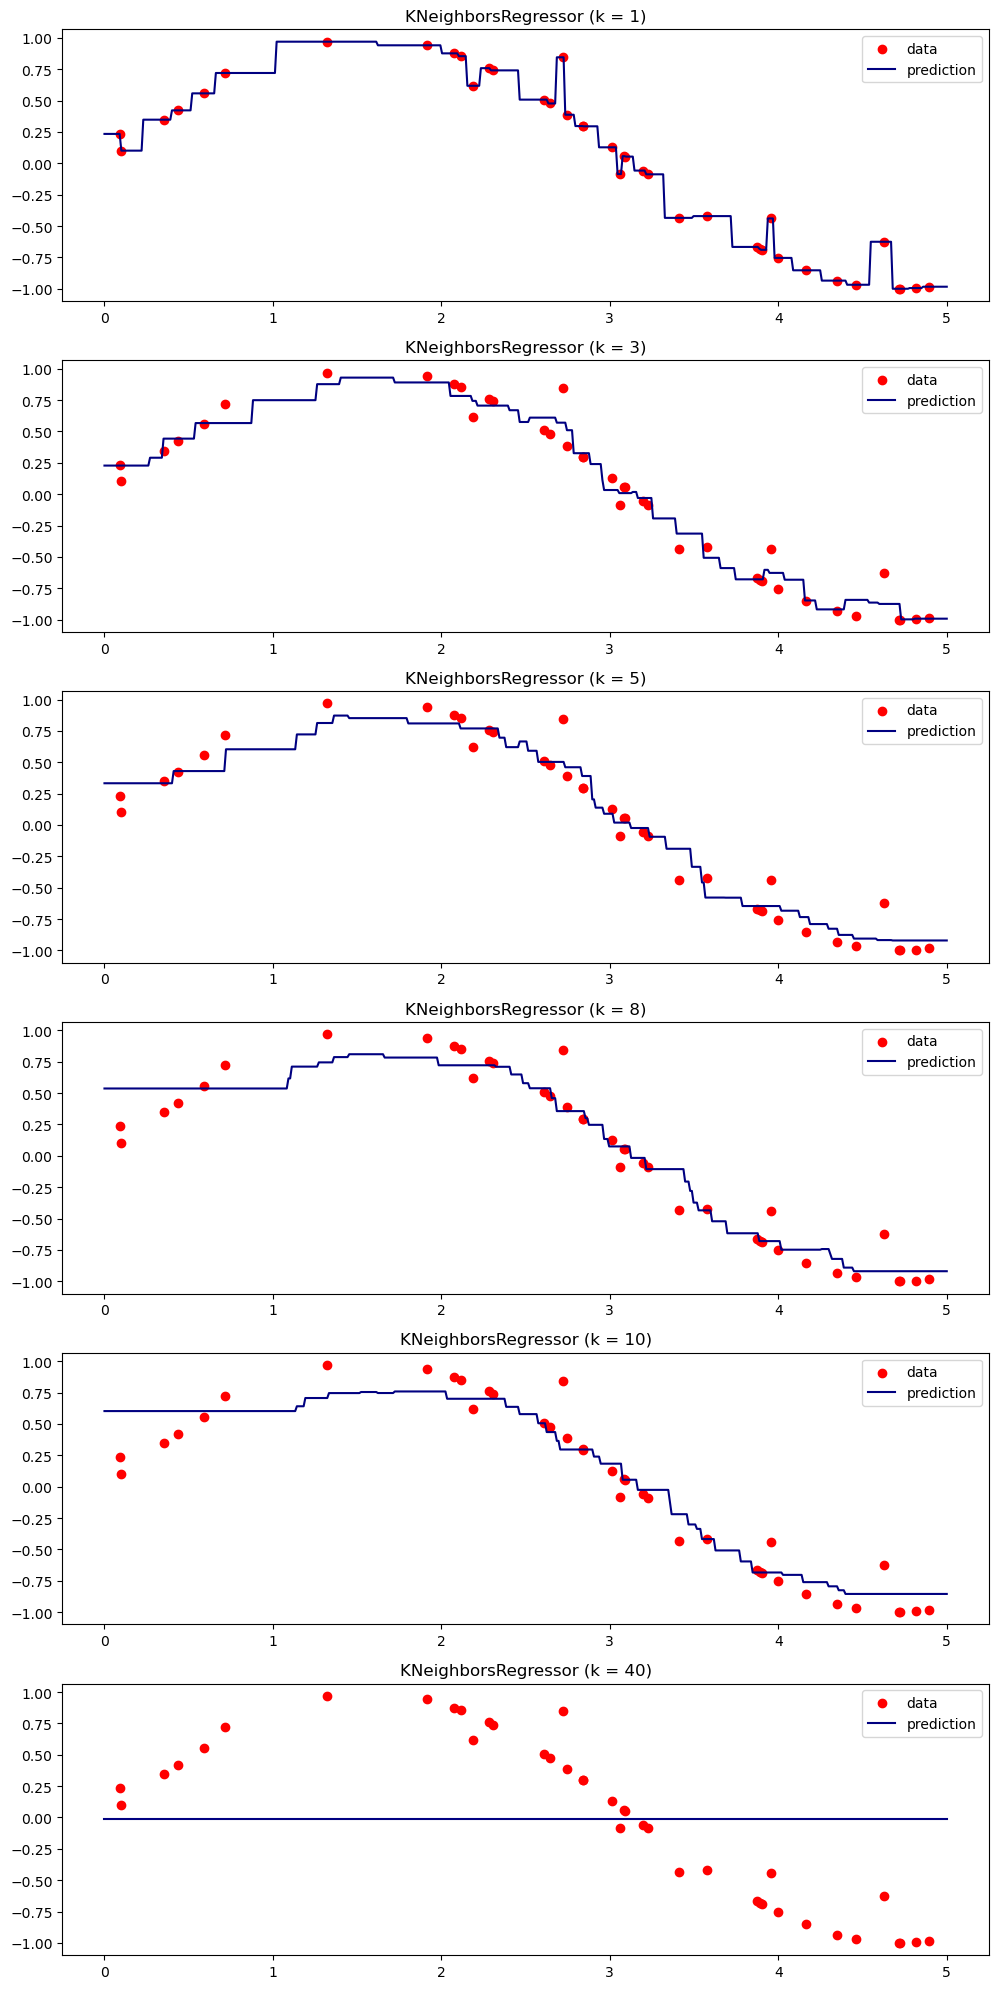

In [6]:
# 设置多个k近邻进行比较
n_neighbors = [1, 3, 5, 8, 10, 40]
# 设置图片大小
plt.figure(figsize=(10,20))
for i, k in enumerate(n_neighbors):
    # 默认使用加权平均进行计算predictor
    clf = KNeighborsRegressor(n_neighbors=k, p=2, metric="minkowski")
    # 训练
    clf.fit(X, y)
    # 预测
    y_ = clf.predict(T)
    plt.subplot(6, 1, i + 1)
    plt.scatter(X, y, color='red', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (k))

plt.tight_layout()
plt.show()

# 马绞痛数据--kNN数据预处理+kNN分类pipeline

# 库函数导入

In [9]:
import numpy as np
import pandas as pd
# kNN分类器
from sklearn.neighbors import KNeighborsClassifier
# kNN数据空值填充
from sklearn.impute import KNNImputer
# 计算带有空值的欧式距离
from sklearn.metrics.pairwise import nan_euclidean_distances
# 交叉验证
from sklearn.model_selection import cross_val_score
# KFlod的函数
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
input_file = "C:/Users/97962/Desktop/horse-colic.csv"
df_data = pd.read_csv(input_file, header=None, na_values='?')
df_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [21]:
# load dataset, 将?变成空值
# 得到训练数据和label, 第23列表示是否发生病变, 1: 表示Yes; 2: 表示No. 
data = df_data.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# 查看所有特征的缺失值个数和缺失率
for i in range(df_data.shape[1]):
    n_miss = df_data[[i]].isnull().sum()
    perc = n_miss / df_data.shape[0] * 100
    if n_miss.values[0] > 0:
        print('>Feat: %d, Missing: %d, Missing ratio: (%.2f%%)' % (i, n_miss, perc))

# 查看总的空值个数
print('KNNImputer before Missing: %d' % sum(np.isnan(X).flatten()))
# 定义 knnimputer
imputer = KNNImputer()
# 填充数据集中的空值
imputer.fit(X)
# 转换数据集
Xtrans = imputer.transform(X)
# 打印转化后的数据集的空值
print('KNNImputer after Missing: %d' % sum(np.isnan(Xtrans).flatten()))

>Feat: 0, Missing: 1, Missing ratio: (0.33%)
>Feat: 3, Missing: 60, Missing ratio: (20.00%)
>Feat: 4, Missing: 24, Missing ratio: (8.00%)
>Feat: 5, Missing: 58, Missing ratio: (19.33%)
>Feat: 6, Missing: 56, Missing ratio: (18.67%)
>Feat: 7, Missing: 69, Missing ratio: (23.00%)
>Feat: 8, Missing: 47, Missing ratio: (15.67%)
>Feat: 9, Missing: 32, Missing ratio: (10.67%)
>Feat: 10, Missing: 55, Missing ratio: (18.33%)
>Feat: 11, Missing: 44, Missing ratio: (14.67%)
>Feat: 12, Missing: 56, Missing ratio: (18.67%)
>Feat: 13, Missing: 104, Missing ratio: (34.67%)
>Feat: 14, Missing: 106, Missing ratio: (35.33%)
>Feat: 15, Missing: 247, Missing ratio: (82.33%)
>Feat: 16, Missing: 102, Missing ratio: (34.00%)
>Feat: 17, Missing: 118, Missing ratio: (39.33%)
>Feat: 18, Missing: 29, Missing ratio: (9.67%)
>Feat: 19, Missing: 33, Missing ratio: (11.00%)
>Feat: 20, Missing: 165, Missing ratio: (55.00%)
>Feat: 21, Missing: 198, Missing ratio: (66.00%)
>Feat: 22, Missing: 1, Missing ratio: (0.33%)

# Pipeline

什么是Pipeline, 我这里直接翻译成数据管道。任何有序的操作有可以看做pipeline，例如工厂流水线，对于机器学习模型来说，这就是数据流水线。 是指数据通过管道中的每一个节点，结果除了之后，继续流向下游。对于我们这个例子，数据是有空值，我们会有一个KNNImputer节点用来填充空值， 之后继续流向下一个kNN分类节点，最后输出模型。

In [22]:
results = list()
strategies = [str(i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 18, 20, 21]]
for s in strategies:
    pipe = Pipeline(steps=[('imputer',KNNImputer(n_neighbors=int(s))),('model',KNeighborsClassifier())])
    scores=[]
    for k in range(20):
        X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.2)
        pipe.fit(X_train,y_train)
        score=pipe.score(X_test,y_test)
        scores.append(score)
    results.append(np.array(scores))
    print('>k: %s, Acc Mean: %.3f, Std: %.3f' % (s, np.mean(scores), np.std(scores)))

>k: 1, Acc Mean: 0.809, Std: 0.031
>k: 2, Acc Mean: 0.811, Std: 0.043
>k: 3, Acc Mean: 0.802, Std: 0.052
>k: 4, Acc Mean: 0.822, Std: 0.042
>k: 5, Acc Mean: 0.818, Std: 0.039
>k: 6, Acc Mean: 0.815, Std: 0.043
>k: 7, Acc Mean: 0.805, Std: 0.039
>k: 8, Acc Mean: 0.813, Std: 0.050
>k: 9, Acc Mean: 0.812, Std: 0.037
>k: 10, Acc Mean: 0.827, Std: 0.034
>k: 15, Acc Mean: 0.821, Std: 0.038
>k: 16, Acc Mean: 0.821, Std: 0.038
>k: 18, Acc Mean: 0.828, Std: 0.041
>k: 20, Acc Mean: 0.811, Std: 0.047
>k: 21, Acc Mean: 0.818, Std: 0.048
